# Notebook for reproducing CL simulations of AFM patterns in Fig4

In [1]:
import numpy as np
from mbhl.simulation import Mask, Physics, System, Circle, Rectangle, Square
from mbhl.simulation import nm, um
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
%mkdir -p subfigs-Fig4

The same functions for plotting CL patterns as in notebook for Fig 3

In [11]:
diffusion = 15 * nm
default_h = 5 * nm
default_alpha = 1.0


def plot_square_P_map(
    ax,
    psi=5.0,
    diameter=100 * nm,
    spacing_raw=400 * nm,
    drift=0 * nm,
    lim=(0.5 * um, 3.5 * um, 0.5 * um, 3.5 * um),
    gap=2.5 * um,
    cmap="viridis",
    alpha=1.0,
    h_ratio=1.0,
):
    psi = np.deg2rad(psi)
    radius = diameter / 2
    H = gap

    trajectory = np.array(
        [(psi, theta) for theta in np.deg2rad(np.linspace(0, 360, 720))]
    )
    phys = Physics(trajectory, diffusion=diffusion, drift=drift)
    W = spacing_raw + diameter
    mask = Mask(
        [Circle(0, 0, radius)],
        unit_cell=(W, W),
        repeat=(20, 20),
        pad=50 * nm,
        thickness=100 * nm,
        spacing=H,
    )
    system = System(mask=mask, physics=phys)
    conv = system.simulate(h=default_h / h_ratio)
    ax.set_axis_off()
    system.draw(
        ax,
        mask_alpha=1.0,
        show_mask=True,
        cmap=cmap,
        mask_lw=4,
        xlim=lim[:2],
        ylim=lim[2:],
        alpha=alpha,
    )
    return system


def plot_hex_P_map(
    ax,
    psi=5.0,
    diameter=100 * nm,
    spacing_raw=400 * nm,
    drift=0 * nm,
    lim=(0.5 * um, 3.5 * um, 0.5 * um, 3.5 * um),
    gap=2.5 * um,
    cmap="viridis",
    alpha=1.0,
    rotate=False,
    h_ratio=1.0,
):
    psi = np.deg2rad(psi)
    radius = diameter / 2
    H = gap

    trajectory = np.array(
        [(psi, theta) for theta in np.deg2rad(np.linspace(0, 360, 720))]
    )
    phys = Physics(trajectory, diffusion=diffusion, drift=drift)
    W = spacing_raw + diameter
    if not rotate:
        pos = [Circle(0, 0, radius), Circle(W / 2, W / 2 * np.sqrt(3), radius)]
        cell = (W, W * 3 ** 0.5)
    else:
        pos = [Circle(0, 0, radius), Circle(W / 2 * np.sqrt(3), W / 2, radius)]
        cell = (W * 3 ** 0.5, W)
    mask = Mask(
        pos,
        unit_cell=cell,
        repeat=(20, 15),
        pad=50 * nm,
        thickness=100 * nm,
        spacing=H,
    )
    system = System(mask=mask, physics=phys)
    conv = system.simulate(h=default_h / h_ratio)
    ax.set_axis_off()
    system.draw(
        ax,
        mask_alpha=1.0,
        show_mask=True,
        mask_lw=4,
        cmap=cmap,
        xlim=lim[:2],
        ylim=lim[2:],
        alpha=alpha,
    )
    return system


def plot_colorbar(cax, cmap="viridis"):
    fig, ax = plt.subplots(1, 1)
    im = ax.imshow([[0, 1], [1, 0]], cmap=cmap)
    fig.colorbar(im, cax=cax)

Manual fitting of AFM morphologies for SiO2 and Ge patterns. To ensure best fitting results we're using individual Rs for each AFM fig

Fitting SiO2
############################################################
Drawing square sio2
(1941, 1941)
Drawing hex sio2
(2552, 1991)
Fitting Ge
############################################################
Drawing square Ge
(1941, 1941)
Drawing hex ge
(1490, 3418)


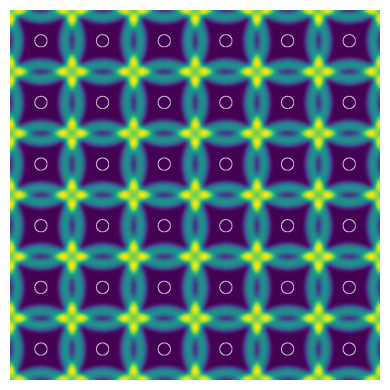

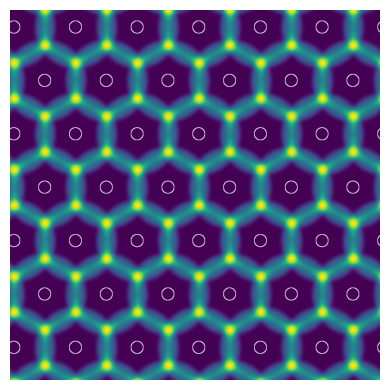

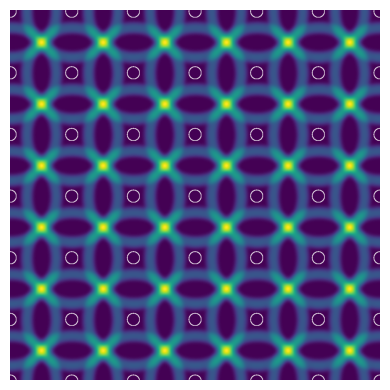

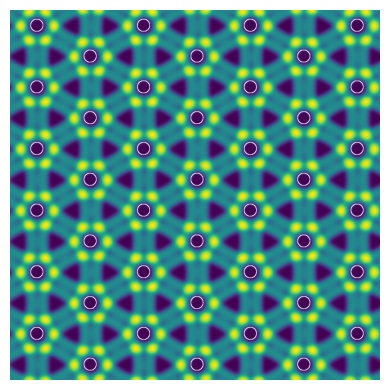

In [6]:
print("Fitting SiO2")
print("#" * 60)

drift = 80 * nm
print("Drawing square sio2")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
x_ = 0.25 * um
y_ = 0.75  * um
L = 3.0 * um
plot_square_P_map(
    ax, drift=drift, lim=(x_, x_ + L, y_, y_ + L), alpha=default_alpha
)
fig.tight_layout()
fig.savefig("subfigs-Fig4/SiO2-square.png", dpi=300)

drift = 55 * nm
print("Drawing hex sio2")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
x_ = 0.72 * um
y_ = 0.60 * um
L = 3.0 * um
plot_hex_P_map(ax, drift=drift, lim=(x_, x_ + L, y_, y_ + L), alpha=default_alpha)
fig.tight_layout()
fig.savefig("subfigs-Fig4/SiO2-hex.png", dpi=300)

print("Fitting Ge")
print("#" * 60)

drift = 142 * nm
print("Drawing square Ge")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
x_ = 0.50 * um
y_ = 0.51 * um
L = 3.0 * um
plot_square_P_map(
    ax, drift=drift, lim=(x_, x_ + L, y_, y_ + L), alpha=default_alpha
)
fig.tight_layout()
fig.savefig("subfigs-Fig4/Ge-square.png", dpi=300)


drift = 162 * nm
print("Drawing hex ge")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
x_ = 0.65 * um
y_ = 0.37 * um
L = 3.0 * um
plot_hex_P_map(ax, drift=drift, lim=(x_, x_ + L, y_, y_ + L), alpha=default_alpha, rotate=True)
fig.tight_layout()
fig.savefig("subfigs-Fig4/Ge-hex.png", dpi=300)


AFM images for Ge deposition with different L spacing

Drawing rect 0
(2321, 2321)
Drawing rect 1
(2329, 2329)
Drawing rect 2
(2340, 2340)
Drawing rect 3
(2360, 2360)


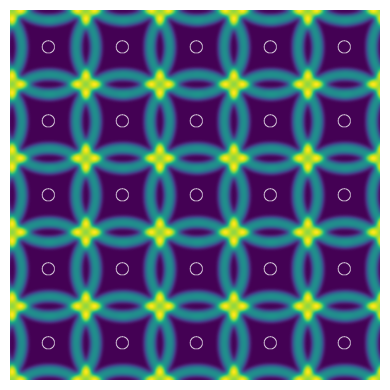

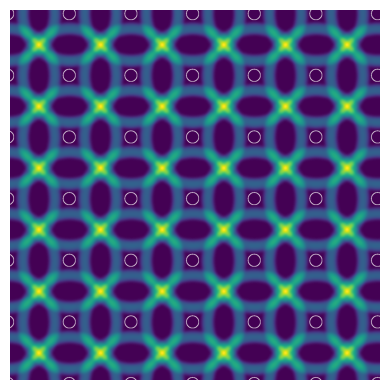

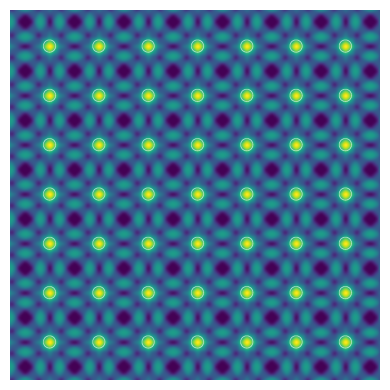

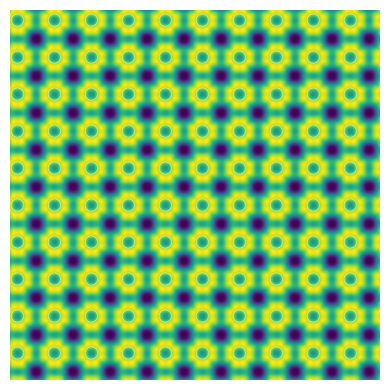

In [12]:
drift = 152 * nm
print("Drawing rect 0")
x_ = 0.89 * um
y_ = 0.30 * um
spacing = 500 * nm
L = 3.0 * um
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_square_P_map(
    ax,
    spacing_raw=spacing,
    drift=drift,
    lim=(x_, x_ + L, y_, y_ + L),
    alpha=default_alpha,
    h_ratio=1.0,
)
fig.tight_layout()
fig.savefig("subfigs-Fig4/Ge-square-L600.png", dpi=300)

print("Drawing rect 1")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
x_ = 0.52 * um
y_ = 0.53 * um
spacing = 400 * nm
L = 3.0 * um
plot_square_P_map(
    ax,
    drift=drift,
    spacing_raw=spacing,
    lim=(x_, x_ + L, y_, y_ + L),
    alpha=default_alpha,
    h_ratio=1.2,
)
fig.tight_layout()
fig.savefig("subfigs-Fig4/Ge-square-L500.png", dpi=300)

print("Drawing rect 2")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
x_ = 0.88 * um
y_ = 0.49 * um
spacing = 300 * nm
L = 3.0 * um
plot_square_P_map(
    ax,
    drift=drift,
    spacing_raw=spacing,
    lim=(x_, x_ + L, y_, y_ + L),
    alpha=default_alpha,
    h_ratio=1.5,
)
fig.tight_layout()
fig.savefig("subfigs-Fig4/Ge-square-L400.png", dpi=300)

print("Drawing rect 3")
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
x_ = 0.84 * um
y_ = 0.38 * um
spacing = 200 * nm
L = 3.0 * um
plot_square_P_map(
    ax,
    drift=drift,
    spacing_raw=spacing,
    lim=(x_, x_ + L, y_, y_ + L),
    alpha=default_alpha,
    h_ratio=2.0
)
fig.tight_layout()
fig.savefig("subfigs-Fig4/Ge-square-L300.png", dpi=300)

Manual fitting of the AFM scan maps. The tiff files will be rendered under `subfigs-Fig4` (but not version-controlled)

Drawing rect, diameter 100 spacing 500
(2321, 2321)
Drawing rect 1
Drawing rect, diameter 100 spacing 400
(1941, 1941)
Drawing rect, diameter 100 spacing 300
(1560, 1560)
Drawing rect 3
Drawing rect, diameter 100 spacing 200
(1180, 1180)
Drawing rect, diameter 200 spacing 500
(2720, 2720)
Drawing rect 1
Drawing rect, diameter 200 spacing 400
(2341, 2341)
Drawing rect, diameter 200 spacing 300
(1960, 1960)
Drawing rect 3
Drawing rect, diameter 200 spacing 200
(1580, 1580)
Drawing rect, diameter 300 spacing 500
(3120, 3120)
Drawing rect 1
Drawing rect, diameter 300 spacing 400
(2740, 2740)
Drawing rect, diameter 300 spacing 300
(2360, 2360)
Drawing rect 3
Drawing rect, diameter 300 spacing 200
(1980, 1980)


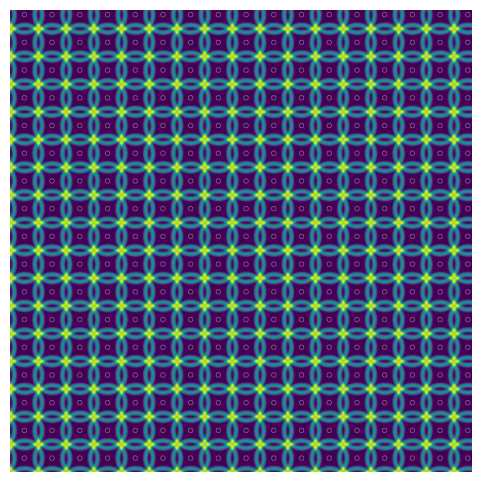

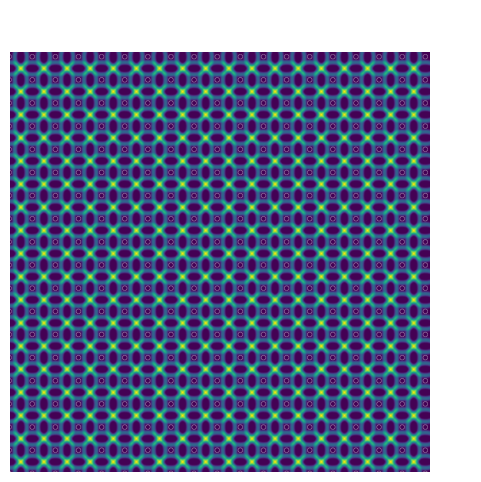

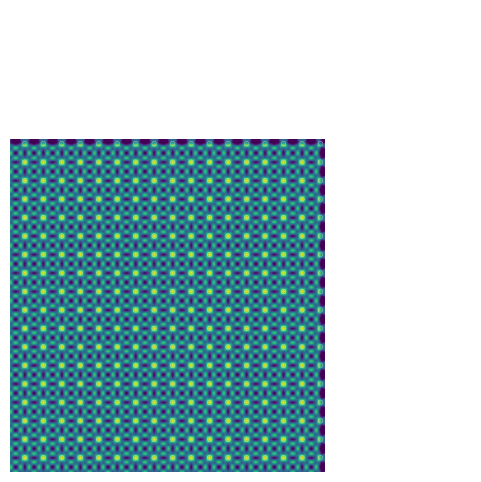

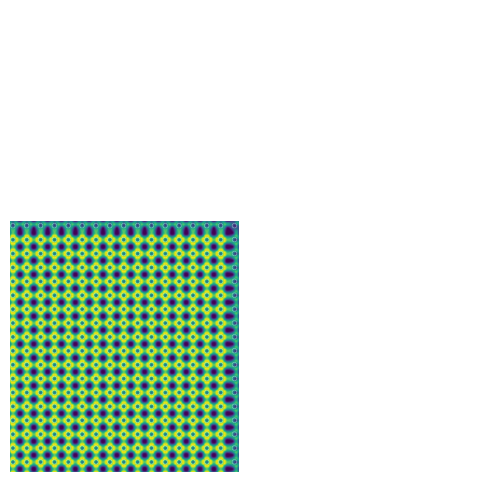

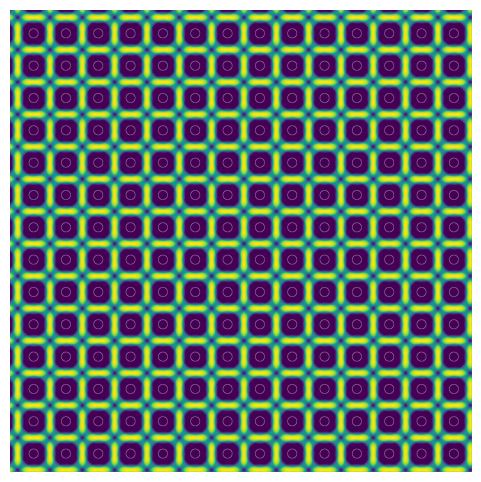

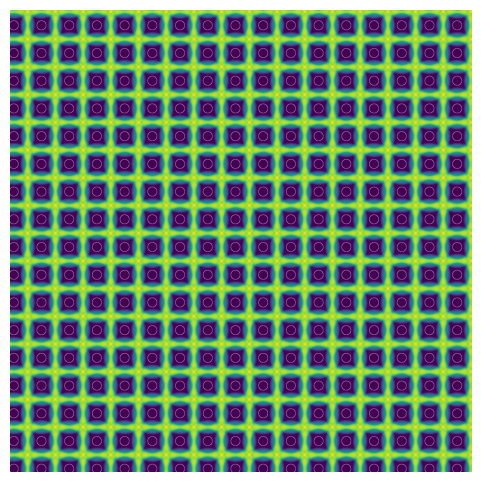

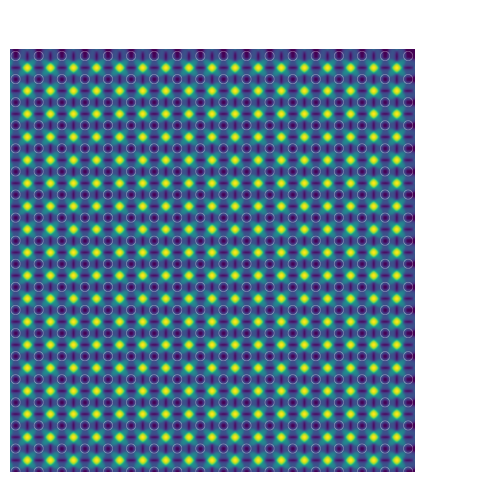

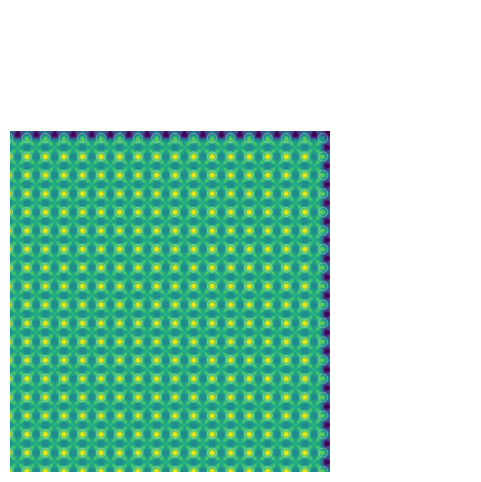

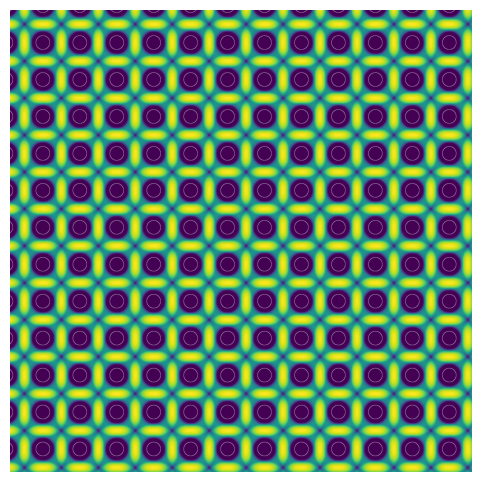

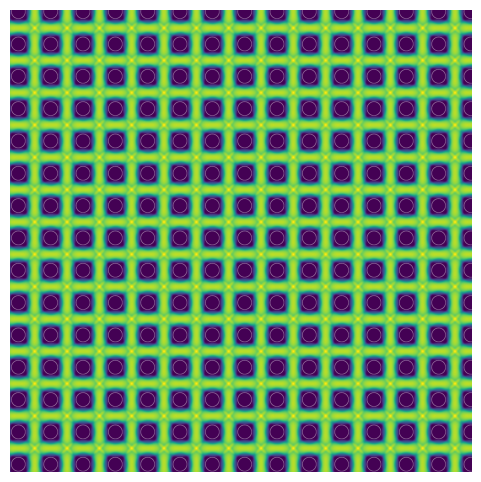

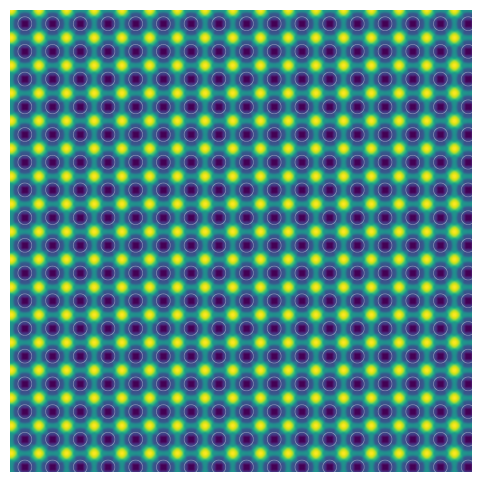

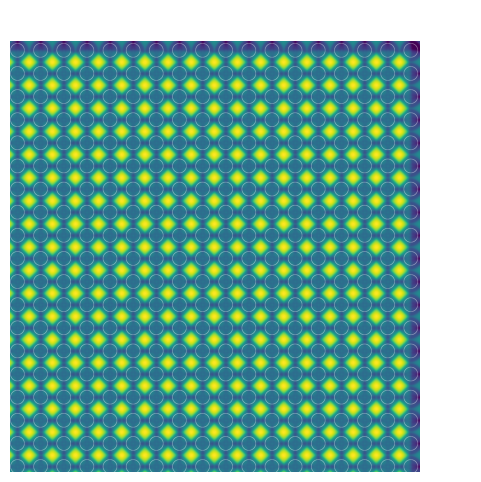

In [13]:
figure_dir = Path("subfigs-Fig4/")
drifts = {
    (100, 200): 142,
    (200, 200): 135,
    (300, 200): 142,
    #
    (100, 300): 140,
    (200, 300): 135,
    (300, 300): 158,
    #
    (100, 400): 154,
    (200, 400): 120,
    (300, 400): 155,
    #
    (100, 500): 152,
    (200, 500): 142,
    (300, 500): 170,
    #
}
for diameter in [100, 200, 300]:
    fig, ax = plt.subplots(figsize=(6, 6))
    x_ = 0.89 * um
    y_ = 0.30 * um
    spacing = 500
    L = 10.0 * um
    drift = drifts[(diameter, spacing)]
    print(f"Drawing rect, diameter {diameter} spacing {spacing}")
    system = plot_square_P_map(
        ax,
        diameter=diameter * nm,
        spacing_raw=spacing * nm,
        drift=drift * nm,
        lim=(x_, x_ + L, y_, y_ + L),
        alpha=default_alpha,
        h_ratio=1.0,
    )
    fig.savefig(figure_dir / f"D{diameter}-S{spacing}-2D.png")
    system.save_tiff(default_h, figure_dir / f"D{diameter}-S{spacing}-3D.tiff")

    print("Drawing rect 1")
    fig, ax = plt.subplots(figsize=(6, 6))
    x_ = 0.52 * um
    y_ = 0.53 * um
    spacing = 400
    L = 10.0 * um
    drift = drifts[(diameter, spacing)]
    print(f"Drawing rect, diameter {diameter} spacing {spacing}")
    system = plot_square_P_map(
        ax,
        diameter=diameter * nm,
        drift=drift * nm,
        spacing_raw=spacing * nm,
        lim=(x_, x_ + L, y_, y_ + L),
        alpha=default_alpha,
        h_ratio=1.0,
    )
    fig.savefig(figure_dir / f"D{diameter}-S{spacing}-2D.png")
    system.save_tiff(default_h, figure_dir / f"D{diameter}-S{spacing}-3D.tiff")

    # print("Drawing rect 2")
    fig, ax = plt.subplots(figsize=(6, 6))
    x_ = 0.88 * um
    y_ = 0.49 * um
    spacing = 300
    L = 10.0 * um
    drift = drifts[(diameter, spacing)]
    print(f"Drawing rect, diameter {diameter} spacing {spacing}")
    system = plot_square_P_map(
        ax,
        diameter=diameter * nm,
        drift=drift * nm,
        spacing_raw=spacing * nm,
        lim=(x_, x_ + L, y_, y_ + L),
        alpha=default_alpha,
        h_ratio=1.0,
    )
    fig.savefig(figure_dir / f"D{diameter}-S{spacing}-2D.png")
    system.save_tiff(default_h, figure_dir / f"D{diameter}-S{spacing}-3D.tiff")

    print("Drawing rect 3")
    fig, ax = plt.subplots(figsize=(6, 6))
    x_ = 0.84 * um
    y_ = 0.38 * um
    spacing = 200
    L = 10.0 * um
    drift = drifts[(diameter, spacing)]
    print(f"Drawing rect, diameter {diameter} spacing {spacing}")
    system = plot_square_P_map(
        ax,
        diameter=diameter * nm,
        drift=drift * nm,
        spacing_raw=spacing * nm,
        lim=(x_, x_ + L, y_, y_ + L),
        alpha=default_alpha,
        h_ratio=1.0
    )
    fig.savefig(figure_dir / f"D{diameter}-S{spacing}-2D.png")
    system.save_tiff(default_h, figure_dir / f"D{diameter}-S{spacing}-3D.tiff")